# Residual Diagnostic Example

<div class="alert alert-info">

This module is newly developed and still experimental. Further refinement should be found in future version.

</div>

## Library an Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import orbit
from orbit.models import DLT
from orbit.diagnostics.plot import residual_diagnostic_plot
from orbit.utils.dataset import load_iclaims
import pandas as pd
import seaborn as sns

/Users/towinazure/opt/miniconda3/envs/orbit39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(orbit.__version__)

1.1.4.3


In [3]:
# load log-transformed data
df = load_iclaims()
response_col = 'claims'
date_col = 'week'

/Users/towinazure/edwinnglabs/orbit/orbit/utils/dataset.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, parse_dates=["week"])


In [4]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


## Model Fitting

In [5]:
dlt = DLT(
    response_col=response_col,
    date_col=date_col,
    estimator='stan-map',
    seed=8888,
    seasonality=52,
    regressor_col=['trend.unemploy', 'trend.filling'],
    regressor_beta_prior=[0.1, 0.3],
    regressor_sigma_prior=[0.5, 2.0],
)

dlt.fit(df)
predicted_df = dlt.predict(df, decompose=False)

2024-01-07 17:06:36 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


## Residual Diagnostic

/Users/towinazure/edwinnglabs/orbit/orbit/diagnostics/plot.py:794: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


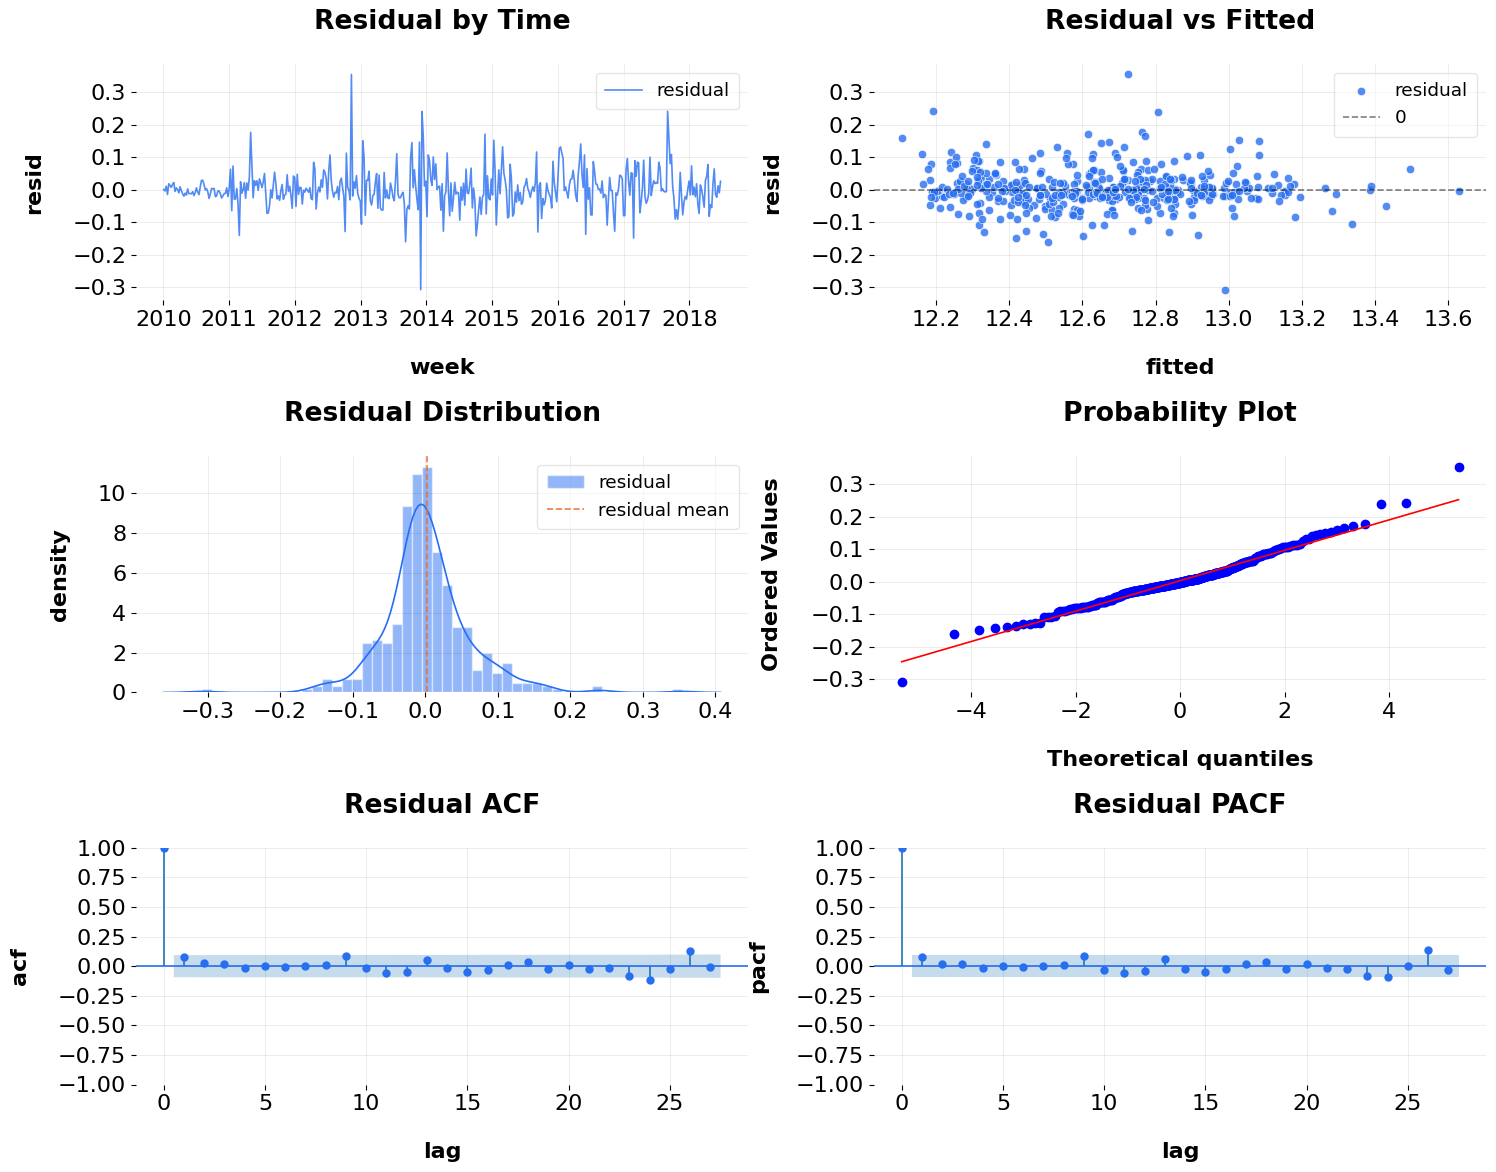

In [6]:
# compute residuals
predicted_df['resid'] = df['claims'] - predicted_df['prediction'] 

residual_diagnostic_plot(
    df=predicted_df,
    dist='t-dist',
    sparams=dlt.get_point_posteriors()['map']['nu'][0],
    residual_col='resid',
)